# ASSIGNMENT_2

# Climate Fever Dataset

In [1]:
# install and import necessary libraries.

!pip install contractions
!pip install textblob


import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

# Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         
import seaborn as sns
from textblob import TextBlob

import spacy
from spacy import displacy

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import numpy as np # linear algebra
import os # accessing directory structure


In [3]:
# Loading data into pandas dataframe
data = pd.read_csv("climate-fever.csv")
data.head()

claim_id                                              claim claim_label  \
0         0  Global warming is driving polar bears toward e...    SUPPORTS   
1         5  The sun has gone into ‘lockdown’ which could c...    SUPPORTS   
2         6        The polar bear population has been growing.     REFUTES   
3         9  Ironic' study finds more CO2 has slightly cool...     REFUTES   
4        10  Human additions of CO2 are in the margin of er...     REFUTES   

                    evidences/0/evidence_id evidences/0/evidence_label  \
0   Extinction risk from global warming:170            NOT_ENOUGH_INFO   
1                                Famine:386                   SUPPORTS   
2                           Polar bear:1332            NOT_ENOUGH_INFO   
3                    Atmosphere of Mars:131            NOT_ENOUGH_INFO   
4  Carbon dioxide in Earth's atmosphere:140            NOT_ENOUGH_INFO   

                    evidences/0/article  \
0   Extinction risk from global warming   
1                                Famine   
2                            Polar bear   
3                    Atmosphere of Mars   
4  Carbon dioxide in Earth's atmosphere   

                                evidences/0/evidence  evidences/0/entropy  \
0  "Recent Research Shows Human Activity Driving ...             0.693147   
1  The current consensus of the scientific commun...             0.000000   
2  "Ask the experts: Are polar bear populations i...             0.693147   
3  CO2 in the mesosphere acts as a cooling agent ...             0.693147   
4  While CO 2 absorption and release is always ha...             0.693147   

  evidences/0/votes/0 evidences/0/votes/1  ... evidences/4/evidence_id  \
0            SUPPORTS     NOT_ENOUGH_INFO  ...         Polar bear:1328   
1            SUPPORTS            SUPPORTS  ...                Winter:5   
2     NOT_ENOUGH_INFO             REFUTES  ...           Polar bear:61   
3     NOT_ENOUGH_INFO            SUPPORTS  ...      Carbon dioxide:191   
4     NOT_ENOUGH_INFO             REFUTES  ...                 Sea:226   

  evidences/4/evidence_label evidences/4/article  \
0            NOT_ENOUGH_INFO          Polar bear   
1            NOT_ENOUGH_INFO              Winter   
2                    REFUTES          Polar bear   
3            NOT_ENOUGH_INFO      Carbon dioxide   
4                    REFUTES                 Sea   

                                evidences/4/evidence evidences/4/entropy  \
0    "Bear hunting caught in global warming debate".            0.693147   
1  In many regions, winter is associated with sno...            0.693147   
2  Of the 19 recognized polar bear subpopulations...            0.000000   
3  Less energy reaches the upper atmosphere, whic...            0.000000   
4  More recently, anthropogenic activities have s...            0.000000   

  evidences/4/votes/0 evidences/4/votes/1  evidences/4/votes/2  \
0            SUPPORTS     NOT_ENOUGH_INFO                  NaN   
1             REFUTES     NOT_ENOUGH_INFO                  NaN   
2             REFUTES             REFUTES                  NaN   
3     NOT_ENOUGH_INFO     NOT_ENOUGH_INFO                  NaN   
4             REFUTES             REFUTES                  NaN   

  evidences/4/votes/3 evidences/4/votes/4  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  
3                 NaN                 NaN  
4                 NaN                 NaN  

[5 rows x 53 columns]

In [4]:
# print shape of data.
data.shape              

(1535, 53)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   claim_id                    1535 non-null   int64  
 1   claim                       1535 non-null   object 
 2   claim_label                 1535 non-null   object 
 3   evidences/0/evidence_id     1535 non-null   object 
 4   evidences/0/evidence_label  1535 non-null   object 
 5   evidences/0/article         1535 non-null   object 
 6   evidences/0/evidence        1535 non-null   object 
 7   evidences/0/entropy         1535 non-null   float64
 8   evidences/0/votes/0         1354 non-null   object 
 9   evidences/0/votes/1         1535 non-null   object 
 10  evidences/0/votes/2         617 non-null    object 
 11  evidences/0/votes/3         5 non-null      object 
 12  evidences/0/votes/4         186 non-null    object 
 13  evidences/1/evidence_id     1535 

In [6]:
#Basic statistical details like percentile, mean, std etc. of a data frame of numeric values. 
data.describe()

claim_id  evidences/0/entropy  evidences/1/entropy  \
count  1535.000000          1535.000000          1535.000000   
mean   1587.749837             0.341184             0.335227   
std     880.886590             0.348338             0.350976   
min       0.000000             0.000000             0.000000   
25%     829.000000             0.000000             0.000000   
50%    1606.000000             0.000000             0.000000   
75%    2319.500000             0.693147             0.693147   
max    3134.000000             1.098612             1.098612   

       evidences/2/entropy  evidences/3/entropy  evidences/4/entropy  
count          1535.000000          1535.000000          1535.000000  
mean              0.347449             0.332517             0.338815  
std               0.351279             0.346795             0.349464  
min               0.000000             0.000000             0.000000  
25%               0.000000             0.000000             0.000000  
50%               0.562335             0.000000             0.000000  
75%               0.693147             0.693147             0.693147  
max               1.098612             1.098612             1.098612

In [7]:
data.isnull().mean() # percent of missing data in each column

claim_id                      0.000000
claim                         0.000000
claim_label                   0.000000
evidences/0/evidence_id       0.000000
evidences/0/evidence_label    0.000000
evidences/0/article           0.000000
evidences/0/evidence          0.000000
evidences/0/entropy           0.000000
evidences/0/votes/0           0.117915
evidences/0/votes/1           0.000000
evidences/0/votes/2           0.598046
evidences/0/votes/3           0.996743
evidences/0/votes/4           0.878827
evidences/1/evidence_id       0.000000
evidences/1/evidence_label    0.000000
evidences/1/article           0.000000
evidences/1/evidence          0.000000
evidences/1/entropy           0.000000
evidences/1/votes/0           0.117915
evidences/1/votes/1           0.000000
evidences/1/votes/2           0.598046
evidences/1/votes/3           0.996743
evidences/1/votes/4           0.878827
evidences/2/evidence_id       0.000000
evidences/2/evidence_label    0.000000
evidences/2/article      

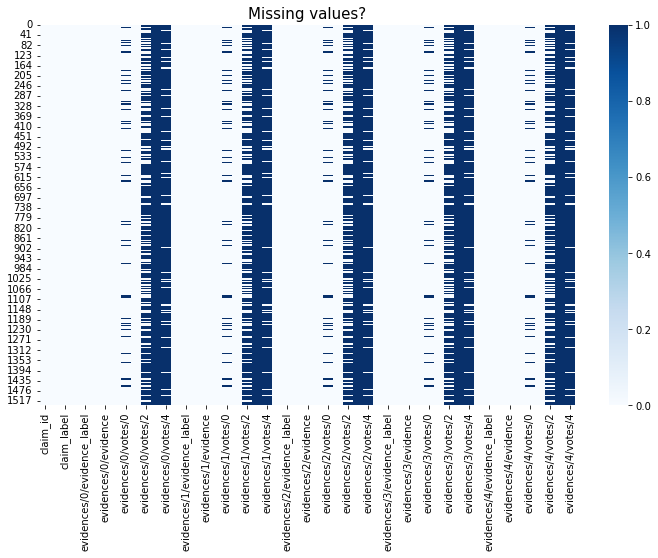

In [8]:
#Visualization of missing value using heatmap
plt.figure(figsize=(12,7))
sns.heatmap(data.isnull(), cmap = "Blues")                       
plt.title("Missing values?", fontsize = 15)
plt.show()

In [9]:
# check the missing values for all the columns
def return_missing_values(data_frame):
    missing_values = data_frame.isnull().sum()
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    return missing_values

#plot the count of missing values in every column 
def plot_missing_values(data_frame):
    missing_values = return_missing_values(data_frame)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='darkgrid')
    sns.barplot(x='Name', y='count', data=missing_values)
    plt.title('Bar plot for Null Values in each column')
    plt.xticks(rotation=90)
    plt.show()

In [10]:
# get the count of missing values in every column of the dataframe
return_missing_values(data)

evidences/0/votes/0     181
evidences/4/votes/0     181
evidences/1/votes/0     181
evidences/3/votes/0     181
evidences/2/votes/0     181
evidences/4/votes/2     918
evidences/3/votes/2     918
evidences/2/votes/2     918
evidences/1/votes/2     918
evidences/0/votes/2     918
evidences/2/votes/4    1349
evidences/0/votes/4    1349
evidences/3/votes/4    1349
evidences/1/votes/4    1349
evidences/4/votes/4    1349
evidences/2/votes/3    1529
evidences/1/votes/3    1530
evidences/4/votes/3    1530
evidences/3/votes/3    1530
evidences/0/votes/3    1530
dtype: int64

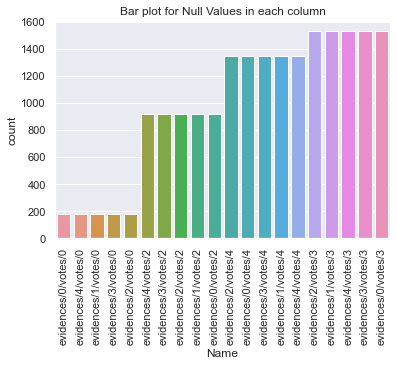

In [11]:
#plotting the count of missing values 
plot_missing_values(data)

# Unique Values

In [12]:
#get the unique values of every column
def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

In [13]:
unidf = return_unique_values(data)
print(unidf)

                      Features  Uniques
0                     claim_id     1535
1                        claim     1535
2                  claim_label        4
3      evidences/0/evidence_id     1220
4   evidences/0/evidence_label        3
5          evidences/0/article      515
6         evidences/0/evidence     1220
7          evidences/0/entropy        8
8          evidences/0/votes/0        3
9          evidences/0/votes/1        3
10         evidences/0/votes/2        3
11         evidences/0/votes/3        2
12         evidences/0/votes/4        3
13     evidences/1/evidence_id     1252
14  evidences/1/evidence_label        3
15         evidences/1/article      517
16        evidences/1/evidence     1252
17         evidences/1/entropy        8
18         evidences/1/votes/0        3
19         evidences/1/votes/1        3
20         evidences/1/votes/2        3
21         evidences/1/votes/3        2
22         evidences/1/votes/4        3
23     evidences/2/evidence_id     1277


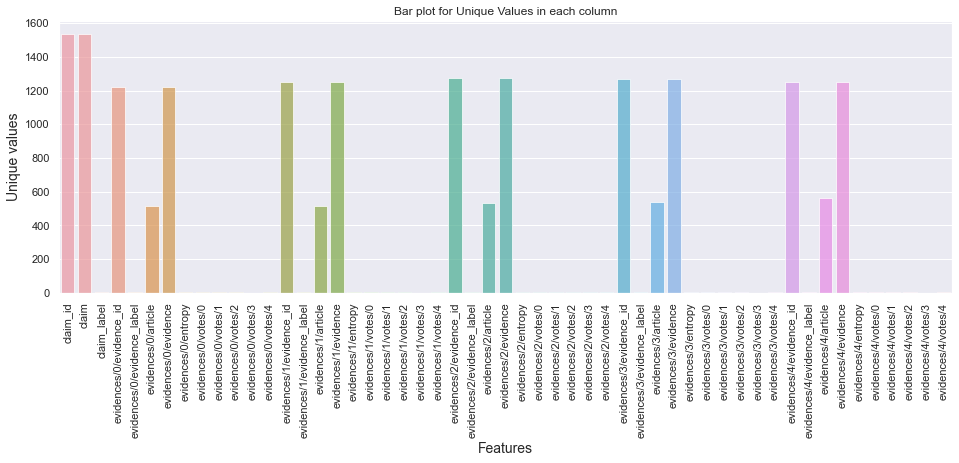

In [14]:
# plot the count of unique values in every column
f, ax = plt.subplots(1,1, figsize=(16,5))
sns.barplot(x=unidf['Features'], y=unidf['Uniques'], alpha=0.7)
plt.title('Bar plot for Unique Values in each column')
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)
plt.show()

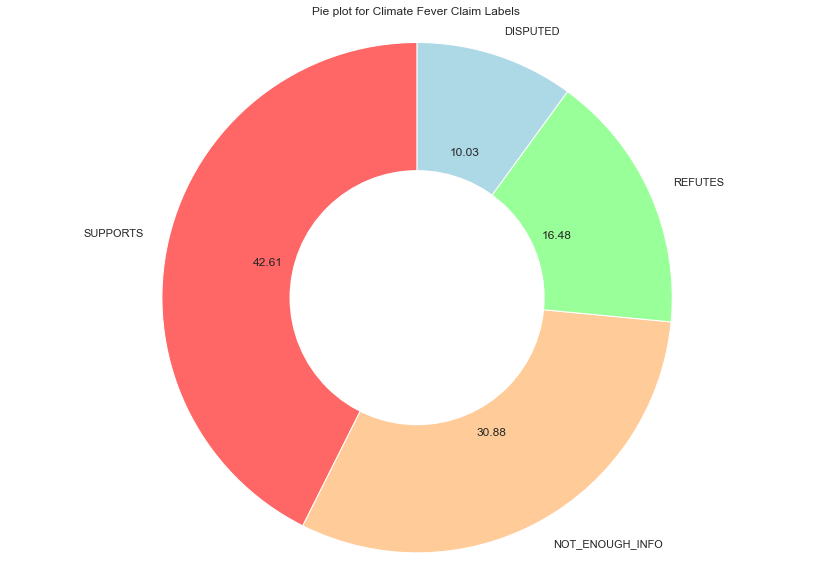

In [15]:
#plot for Climate Fever Claim Labels
#Using matplotlib
colors = ['#ff6666', '#ffcc99', '#99ff99', '#ADD8E6']

sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = plt.pie(data['claim_label'].value_counts(), labels=data['claim_label'].value_counts().index, colors=colors, startangle=90,  autopct='%.2f')
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Pie plot for Climate Fever Claim Labels')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Distribution of words for each class before Text Preprocessing

In [16]:
#get the no of words in every text
data['word_count'] = [len(t.split()) for t in data.claim]
data.head()

claim_id                                              claim claim_label  \
0         0  Global warming is driving polar bears toward e...    SUPPORTS   
1         5  The sun has gone into ‘lockdown’ which could c...    SUPPORTS   
2         6        The polar bear population has been growing.     REFUTES   
3         9  Ironic' study finds more CO2 has slightly cool...     REFUTES   
4        10  Human additions of CO2 are in the margin of er...     REFUTES   

                    evidences/0/evidence_id evidences/0/evidence_label  \
0   Extinction risk from global warming:170            NOT_ENOUGH_INFO   
1                                Famine:386                   SUPPORTS   
2                           Polar bear:1332            NOT_ENOUGH_INFO   
3                    Atmosphere of Mars:131            NOT_ENOUGH_INFO   
4  Carbon dioxide in Earth's atmosphere:140            NOT_ENOUGH_INFO   

                    evidences/0/article  \
0   Extinction risk from global warming   
1                                Famine   
2                            Polar bear   
3                    Atmosphere of Mars   
4  Carbon dioxide in Earth's atmosphere   

                                evidences/0/evidence  evidences/0/entropy  \
0  "Recent Research Shows Human Activity Driving ...             0.693147   
1  The current consensus of the scientific commun...             0.000000   
2  "Ask the experts: Are polar bear populations i...             0.693147   
3  CO2 in the mesosphere acts as a cooling agent ...             0.693147   
4  While CO 2 absorption and release is always ha...             0.693147   

  evidences/0/votes/0 evidences/0/votes/1  ... evidences/4/evidence_label  \
0            SUPPORTS     NOT_ENOUGH_INFO  ...            NOT_ENOUGH_INFO   
1            SUPPORTS            SUPPORTS  ...            NOT_ENOUGH_INFO   
2     NOT_ENOUGH_INFO             REFUTES  ...                    REFUTES   
3     NOT_ENOUGH_INFO            SUPPORTS  ...            NOT_ENOUGH_INFO   
4     NOT_ENOUGH_INFO             REFUTES  ...                    REFUTES   

  evidences/4/article                               evidences/4/evidence  \
0          Polar bear    "Bear hunting caught in global warming debate".   
1              Winter  In many regions, winter is associated with sno...   
2          Polar bear  Of the 19 recognized polar bear subpopulations...   
3      Carbon dioxide  Less energy reaches the upper atmosphere, whic...   
4                 Sea  More recently, anthropogenic activities have s...   

  evidences/4/entropy evidences/4/votes/0 evidences/4/votes/1  \
0            0.693147            SUPPORTS     NOT_ENOUGH_INFO   
1            0.693147             REFUTES     NOT_ENOUGH_INFO   
2            0.000000             REFUTES             REFUTES   
3            0.000000     NOT_ENOUGH_INFO     NOT_ENOUGH_INFO   
4            0.000000             REFUTES             REFUTES   

  evidences/4/votes/2  evidences/4/votes/3 evidences/4/votes/4 word_count  
0                 NaN                  NaN                 NaN          8  
1                 NaN                  NaN                 NaN         16  
2                 NaN                  NaN                 NaN          7  
3                 NaN                  NaN                 NaN         10  
4                 NaN                  NaN                 NaN         34  

[5 rows x 54 columns]

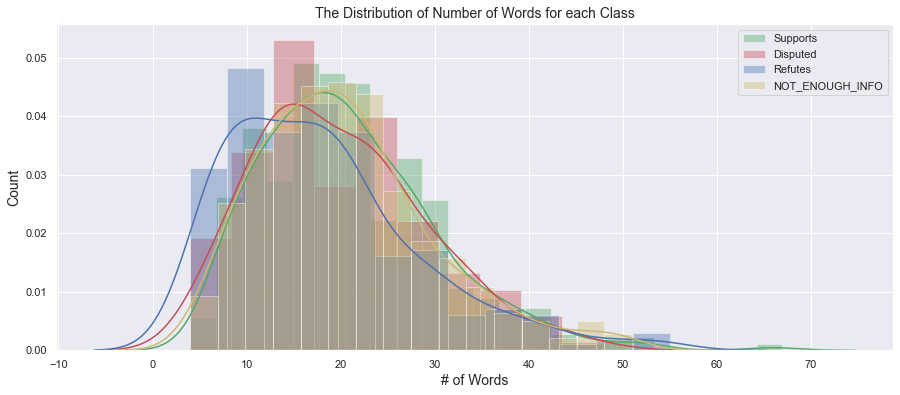

In [17]:
#get the distribution of words for each class
fig = plt.figure(figsize = (15, 6))
sns.distplot(data['word_count'][data['claim_label']=='SUPPORTS'], color='g', label = 'Supports')
sns.distplot(data['word_count'][data['claim_label']=='DISPUTED'], color='r', label = 'Disputed')
sns.distplot(data['word_count'][data['claim_label']=='REFUTES'], color='b', label = 'Refutes')
sns.distplot(data['word_count'][data['claim_label']=='NOT_ENOUGH_INFO'], color='y', label = 'NOT_ENOUGH_INFO')
plt.legend(loc='best')
plt.xlabel('# of Words', size = 14)
plt.ylabel('Count', size = 14)
plt.title('The Distribution of Number of Words for each Class', fontsize = 14)
plt.show()

# Word Cloud for SUPPORTS Before Text Prepocessing

In [18]:
from wordcloud import WordCloud,STOPWORDS

In [19]:
support=data[data['claim_label']=='SUPPORTS']
words = ' '.join(support['claim'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [20]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

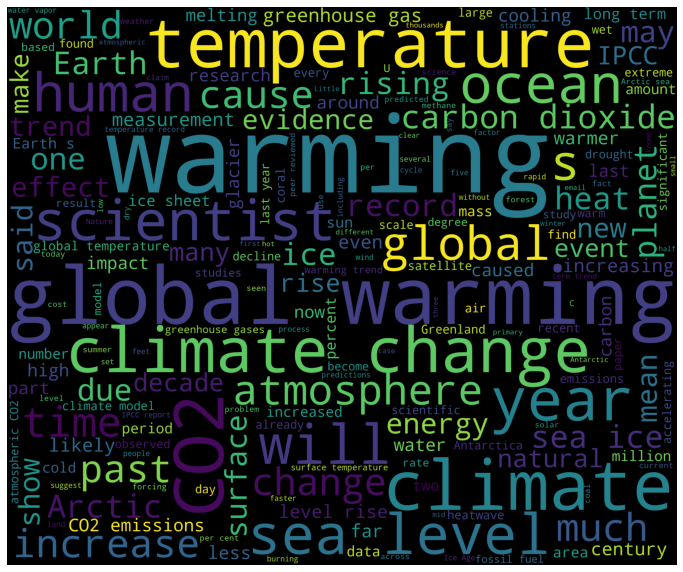

In [21]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [22]:
blob = TextBlob(cleaned_word)
word_freq = blob.word_counts

for word, freq in word_freq.items():
    print(f"{word}: {freq}")

global: 136
warming: 182
is: 265
driving: 3
polar: 9
bears: 4
toward: 3
extinction: 3
the: 929
sun: 14
has: 76
gone: 3
into: 27
‘: 34
lockdown: 1
’: 99
which: 48
could: 26
cause: 20
freezing: 1
weather: 21
earthquakes: 1
and: 322
famine: 3
say: 10
scientists: 50
they: 19
tell: 3
us: 9
that: 190
we: 43
are: 118
primary: 7
forces: 2
controlling: 1
earth: 38
temperatures: 40
by: 118
burning: 7
of: 426
fossil: 10
fuels: 7
releasing: 2
their: 6
carbon: 40
dioxide: 26
great: 9
barrier: 5
reef: 6
experiencing: 2
most: 31
widespread: 3
bleaching: 7
ever: 9
recorded: 5
volcanoes: 3
melting: 15
west: 4
antarctic: 10
glaciers: 17
not: 44
discovery: 2
massive: 3
volcanic: 5
co2: 89
emissions: 42
discredits: 2
theory: 5
more: 83
than: 73
500: 4
professionals: 3
in: 301
climate: 130
related: 5
fields: 3
have: 81
sent: 2
a: 249
european: 2
declaration: 3
to: 259
secretary-general: 2
united: 8
nations: 4
does: 2
change: 68
it: 67
responds: 1
s: 84
mean: 9
temperature: 50
over: 40
last: 26
2,000: 1
yea

In [23]:
items = blob.word_counts.items()

In [24]:
from operator import itemgetter
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

In [25]:
top20 = sorted_items[1:21]

In [26]:
 df_support_before = pd.DataFrame(top20, columns=['word', 'count'])

In [27]:
 df_support_before

word  count
0        of    426
1       and    322
2        in    301
3        is    265
4        to    259
5         a    249
6      that    190
7   warming    182
8    global    136
9   climate    130
10      are    118
11       by    118
12        ’     99
13       as     95
14      co2     89
15        s     84
16     more     83
17     have     81
18       on     81
19      has     76

# Visualizing the DataFrame Before Text Prepocessing - SUPPORTS

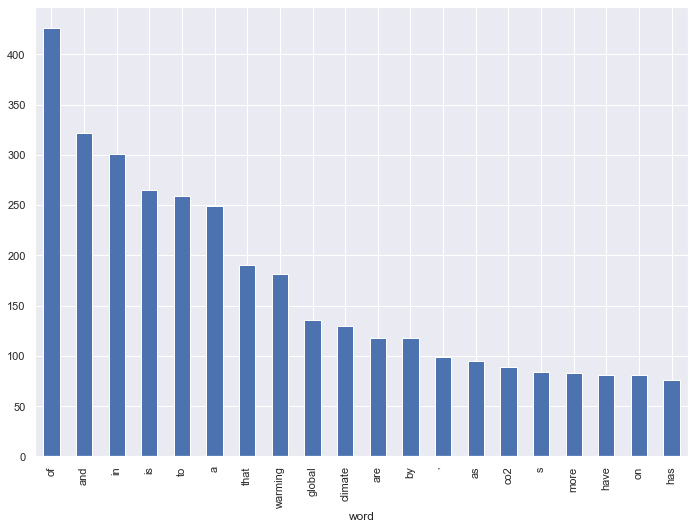

In [28]:
axes =  df_support_before.plot.bar(x='word', y='count', legend=False)

# Word Cloud for DISPUTES Before Text Prepocessing

In [29]:
from wordcloud import WordCloud,STOPWORDS

In [30]:
disputed=data[data['claim_label']=='DISPUTED']
words = ' '.join(disputed['claim'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [31]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

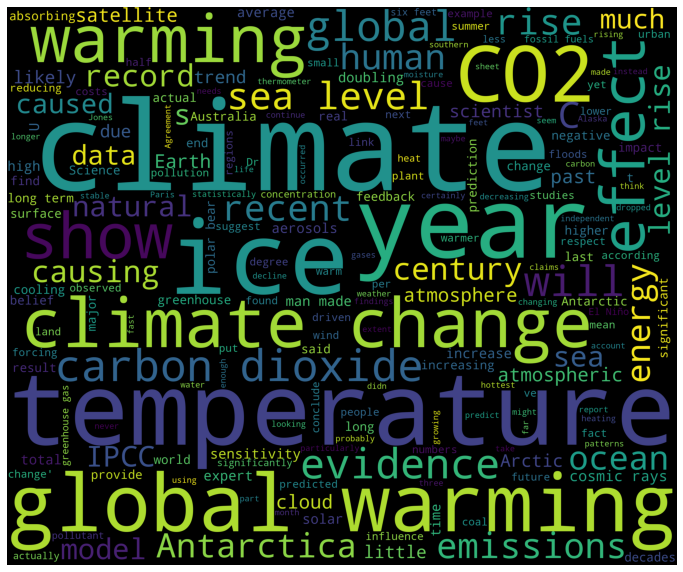

In [32]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [33]:
blob = TextBlob(cleaned_word)
word_freq = blob.word_counts

for word, freq in word_freq.items():
    print(f"{word}: {freq}")

t: 4
he: 1
raw: 1
data: 7
the: 183
actual: 4
thermometer: 1
shows: 4
that: 62
us: 4
has: 13
been: 15
cooling: 4
for: 21
80: 1
to: 77
90: 2
years: 12
so: 4
means: 1
probably: 2
about: 5
half: 3
maybe: 2
of: 79
nine-tenths: 1
degree: 2
total: 5
warming: 37
might: 2
be: 15
caused: 7
by: 28
greenhouse: 6
gases: 2
a: 51
windmill: 1
could: 8
spin: 1
until: 3
it: 12
falls: 1
apart: 1
and: 63
never: 2
generate: 1
as: 13
much: 7
energy: 9
was: 9
invested: 1
in: 56
building: 1
sea-level: 4
rise: 16
does: 2
not: 21
seem: 2
depend: 1
on: 18
ocean: 9
temperature: 15
certainly: 2
co2: 20
geological: 1
history: 1
planet: 1
major: 4
planetary: 1
climate: 38
changes: 3
have: 30
driven: 3
trace: 1
gas: 3
an: 13
interview: 1
with: 16
bbc: 1
after: 3
scandal: 1
broke: 1
dr: 3
jones: 2
admitted: 1
there: 21
had: 3
no: 12
statistically: 2
significant: 4
global: 32
since: 5
1995: 2
models: 7
predicted: 2
seven: 1
times: 4
observed: 3
most: 10
atmospheric: 7
moisture: 2
originates: 1
tropical: 1
difference: 1

In [34]:
items = blob.word_counts.items()

In [35]:
from operator import itemgetter
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

In [36]:
top20 = sorted_items[1:21]

In [37]:
 df_disputed_before = pd.DataFrame(top20, columns=['word', 'count'])

In [38]:
 df_disputed_before

word  count
0        of     79
1        to     77
2       and     63
3      that     62
4        is     62
5        in     56
6         a     51
7   climate     38
8   warming     37
9    global     32
10     have     30
11       by     28
12      are     28
13      ice     22
14      for     21
15      not     21
16    there     21
17      co2     20
18   change     19
19       on     18

# Visualizing the DataFrame Before Text Prepocessing - DISPUTED

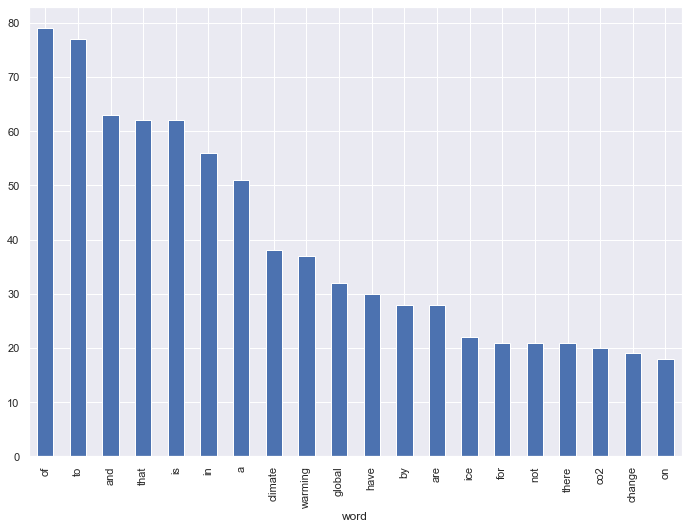

In [39]:
axes =  df_disputed_before.plot.bar(x='word', y='count', legend=False)

# Word Cloud for REFUTES Before Text Prepocessing

In [40]:
from wordcloud import WordCloud,STOPWORDS

In [41]:
refute=data[data['claim_label']=='REFUTES']
words = ' '.join(refute['claim'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [42]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

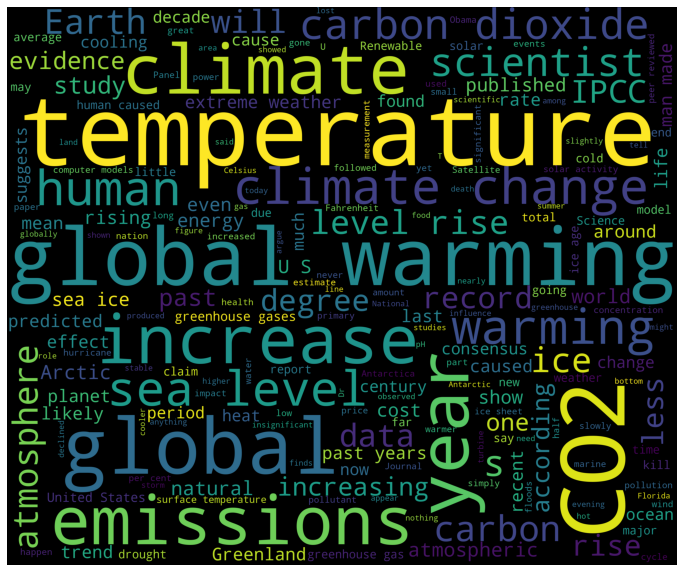

In [43]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [44]:
blob = TextBlob(cleaned_word)
word_freq = blob.word_counts

for word, freq in word_freq.items():
    print(f"{word}: {freq}")

the: 284
polar: 4
bear: 2
population: 1
has: 41
been: 20
growing: 2
ironic: 1
study: 9
finds: 3
more: 18
co2: 35
slightly: 3
cooled: 1
planet: 7
human: 10
additions: 1
of: 146
are: 29
in: 106
margin: 1
error: 1
current: 2
measurements: 3
and: 74
gradual: 1
increase: 21
is: 96
mainly: 1
from: 16
oceans: 3
degassing: 1
as: 40
slowly: 4
emerges: 1
last: 7
ice: 29
age: 3
it: 21
’: 22
s: 27
not: 40
a: 77
pollutant: 3
that: 73
threatens: 1
civilization: 1
if: 15
was: 23
so: 11
terrible: 1
for: 24
then: 1
installing: 1
generator: 1
greenhouse: 14
would: 6
kill: 2
plants: 1
sea: 25
level: 18
rise: 22
slow: 2
constant: 1
pre-dating: 1
industrialization: 1
harvard: 1
wind: 4
turbines: 2
create: 2
global: 64
warming: 54
than: 28
fossil: 1
fuels: 1
they: 8
eliminate: 1
berg: 1
melts: 1
ocean: 6
remains: 1
same: 3
scientists: 15
studying: 1
antarctica: 4
warn: 1
accumulation: 1
could: 6
spark: 1
next: 2
unprecedented: 2
climate: 45
change: 28
caused: 7
at: 12
sydney: 1
harbour: 1
to: 85
approximate

In [45]:
items = blob.word_counts.items()

In [46]:
from operator import itemgetter
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

In [47]:
top20 = sorted_items[1:21]

In [48]:
df_refutes_before = pd.DataFrame(top20, columns=['word', 'count'])

In [49]:
df_refutes_before

word  count
0        of    146
1        in    106
2        is     96
3        to     85
4         a     77
5       and     74
6      that     73
7    global     64
8   warming     54
9   climate     45
10      has     41
11       as     40
12      not     40
13   carbon     36
14       on     36
15      co2     35
16       by     33
17       no     32
18      are     29
19      ice     29

# Visualizing the DataFrame Before Text Prepocessing - REFUTES

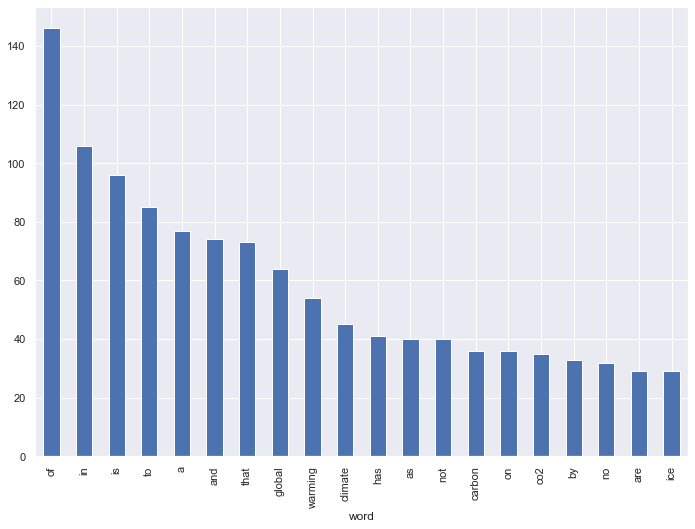

In [50]:
axes =  df_refutes_before.plot.bar(x='word', y='count', legend=False)

# Word Cloud for NOT_ENOUGH_INFO

In [51]:
from wordcloud import WordCloud,STOPWORDS

In [52]:
not_enough=data[data['claim_label']=='NOT_ENOUGH_INFO']
words = ' '.join(not_enough['claim'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [53]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

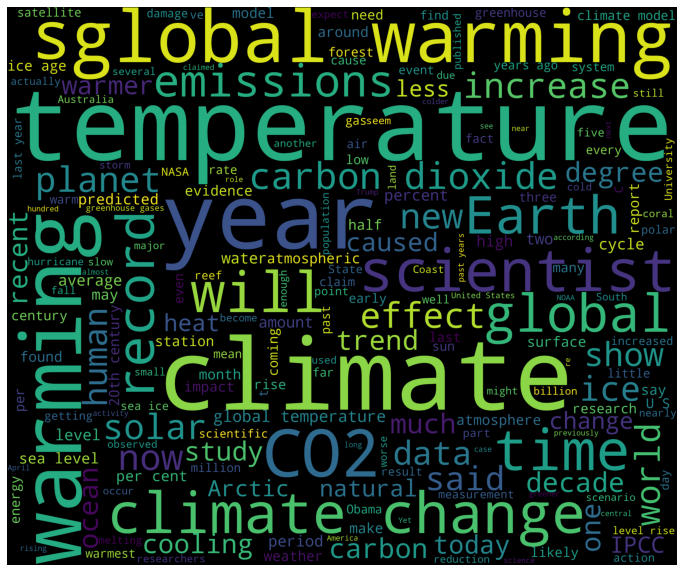

In [54]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [55]:
blob = TextBlob(cleaned_word)
word_freq = blob.word_counts

for word, freq in word_freq.items():
    print(f"{word}: {freq}")

earth: 25
about: 32
to: 202
enter: 1
30-year: 1
‘: 19
mini: 2
ice: 36
age: 9
’: 88
the: 660
bushfires: 1
in: 215
australia: 6
were: 25
caused: 13
by: 74
arsonists: 1
and: 197
a: 193
series: 3
of: 315
lightning: 1
strikes: 1
not: 60
climate: 104
change: 37
when: 16
exact: 3
same: 1
group: 3
experts: 3
who: 6
claimed: 5
it: 55
was: 49
global: 88
cooling: 16
1977: 1
now: 21
claim: 3
s: 64
warming: 99
you: 9
can: 17
easily: 2
see: 5
why: 1
i: 2
am: 1
skeptical: 1
nasa: 7
has: 51
been: 30
adjusting: 2
temperatures: 44
from: 62
past: 14
fifty-five: 1
thousand: 2
years: 46
ago: 10
whole: 1
world: 18
2°c: 1
warmer: 14
than: 57
is: 132
today: 15
o: 1
ne: 1
previously: 5
fastest: 1
shrinking: 2
glaciers: 1
growing: 3
again: 4
calling: 1
into: 11
question: 3
narrative: 1
that: 137
rapid: 4
burping: 1
cows: 3
are: 59
more: 43
damaging: 1
all: 20
cars: 2
on: 57
this: 26
planet: 19
unspot: 1
activity: 9
surface: 10
our: 12
star: 1
dropped: 2
new: 17
low: 11
noaa: 5
adjusted: 1
look: 3
colder: 5
they

In [56]:
items = blob.word_counts.items()

In [57]:
from operator import itemgetter
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

In [58]:
top20 = sorted_items[1:21]

In [59]:
df_not_enough_info_before = pd.DataFrame(top20, columns=['word', 'count'])

In [60]:
df_not_enough_info_before

word  count
0        of    315
1        in    215
2        to    202
3       and    197
4         a    193
5      that    137
6        is    132
7   climate    104
8   warming     99
9         ’     88
10   global     88
11       by     74
12       as     72
13      for     66
14        s     64
15     from     62
16      not     60
17      are     59
18     than     57
19       on     57

# Visualizing the DataFrame Before Text Prepocessing - NOT_ENOUGH_INFO

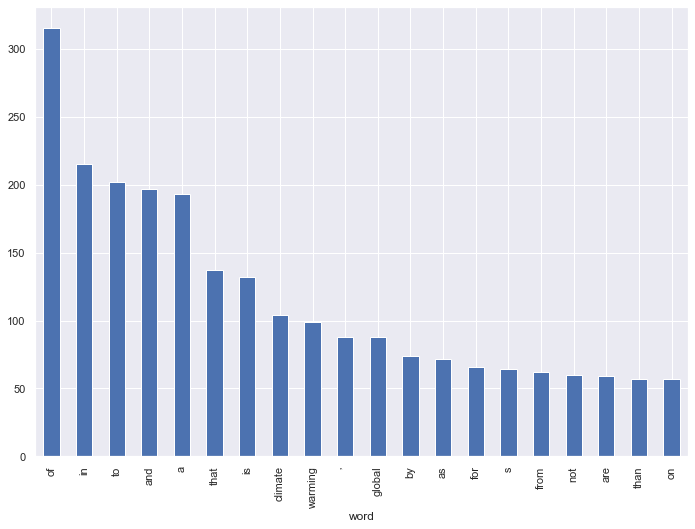

In [61]:
axes =  df_not_enough_info_before.plot.bar(x='word', y='count', legend=False)

# Text Pre-processing

Remove html tags.

Replace contractions in string. (e.g. replace I'm --> I am) and so on.\

Remove numbers.

Remove the URL's.

Remove the mentions in the tweets('@').

Tokenization.

To remove Stopwords.

Remove the punctuations.

Remove the non-ASCII characters.

Remove the hashtags.

Lemmatized data.

We used Spacy for Lemmatization and Stopwords and the NLTK library to tokenize remaining words.

In [62]:
data = data[["claim","claim_label"]]

In [63]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head()                                 # Check first 5 rows of data

claim  \
0                                                                                                                                        Global warming is driving polar bears toward extinction   
1                                                                                    The sun has gone into ‘lockdown’ which could cause freezing weather, earthquakes and famine, say scientists   
2                                                                                                                                                    The polar bear population has been growing.   
3                                                                                                                                    Ironic' study finds more CO2 has slightly cooled the planet   
4  Human additions of CO2 are in the margin of error of current measurements and the gradual increase in CO2 is mainly from oceans degassing as the planet slowly emerges from the last ice age.   

  claim_label  
0    SUPPORTS  
1    SUPPORTS  
2     REFUTES  
3     REFUTES  
4     REFUTES

# SPACY for Lemmatization and Stopwords

In [64]:
import spacy

In [65]:
from spacy import displacy

In [66]:
nlp = spacy.load("en_core_web_sm")

In [67]:
def process_text(claim):
    """
    Lemmatizes the text and removes stopwords.
    """
    doc = nlp(claim)
    return ' '.join([token.lemma_ for token in doc if not token.is_stop])

In [68]:
# Apply the function
data['claim'] = data['claim'].apply(process_text)

data.head()

claim  \
0                                                                                  global warming drive polar bear extinction   
1                                                    sun go ' lockdown ' cause freeze weather , earthquake famine , scientist   
2                                                                                                polar bear population grow .   
3                                                                                ironic ' study find CO2 slightly cool planet   
4  human addition CO2 margin error current measurement gradual increase CO2 mainly ocean degas planet slowly emerge ice age .   

  claim_label  
0    SUPPORTS  
1    SUPPORTS  
2     REFUTES  
3     REFUTES  
4     REFUTES

# NLTK for Tokenization

In [69]:
data['claim'] = data.apply(lambda row: nltk.word_tokenize(row['claim']), axis=1) # Tokenization of data
data.head()

claim  \
0                                                                                               [global, warming, drive, polar, bear, extinction]   
1                                                          [sun, go, ', lockdown, ', cause, freeze, weather, ,, earthquake, famine, ,, scientist]   
2                                                                                                              [polar, bear, population, grow, .]   
3                                                                                           [ironic, ', study, find, CO2, slightly, cool, planet]   
4  [human, addition, CO2, margin, error, current, measurement, gradual, increase, CO2, mainly, ocean, degas, planet, slowly, emerge, ice, age, .]   

  claim_label  
0    SUPPORTS  
1    SUPPORTS  
2     REFUTES  
3     REFUTES  
4     REFUTES

In [70]:
#remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# convert all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


# Remove the hashtags
def remove_hash(text):
   """Remove hashtags from list of tokenized words"""
   new_words = []
   for word in words:
     new_word = re.sub(r'#\w+','',word)
     if new_word != '':
       new_words.append(new_word)
   return new_words

# Remove the punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words


  

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    return ' '.join(words)

data['claim'] = data.apply(lambda row: normalize(row['claim']), axis=1)

In [71]:
data.head()

claim  \
0                                                                                global warming drive polar bear extinction   
1                                                          sun go lockdown cause freeze weather earthquake famine scientist   
2                                                                                                polar bear population grow   
3                                                                                ironic study find co2 slightly cool planet   
4  human addition co2 margin error current measurement gradual increase co2 mainly ocean degas planet slowly emerge ice age   

  claim_label  
0    SUPPORTS  
1    SUPPORTS  
2     REFUTES  
3     REFUTES  
4     REFUTES

In [72]:
data.tail()

claim  \
1530                                                     60 warming observe 1970 2000 likely cause natural 60 year climatic cycle warming phase   
1531  skeptic hope postma alternative thermal model lead birth new climatology actually follow law physics properly physical modeling technique   
1532                  possible cause climate change associate solar activity relate variation temperature liquid core earth 5400 degree celsius   
1533                                                                           need high heat flow high temperature core affect surface climate   
1534                                                                                                 decade heatwave time likely global warming   

          claim_label  
1530  NOT_ENOUGH_INFO  
1531  NOT_ENOUGH_INFO  
1532         SUPPORTS  
1533  NOT_ENOUGH_INFO  
1534         SUPPORTS

# NER AND POS

In [73]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.chunk import tree2conlltags

# Download necessary resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [74]:
# Function to get POS tags and named entities
def get_pos_and_ner(sentence):
    words = word_tokenize(sentence)
    pos_tags = pos_tag(words)
    named_entities_tree = ne_chunk(pos_tags)
    named_entities = tree2conlltags(named_entities_tree)
    
    return pos_tags, named_entities

In [75]:
data['POS'] = data['claim'].apply(lambda x: get_pos_and_ner(x)[0])
data['NER'] = data['claim'].apply(lambda x: get_pos_and_ner(x)[1])

In [76]:
data.head()

claim  \
0                                                                                global warming drive polar bear extinction   
1                                                          sun go lockdown cause freeze weather earthquake famine scientist   
2                                                                                                polar bear population grow   
3                                                                                ironic study find co2 slightly cool planet   
4  human addition co2 margin error current measurement gradual increase co2 mainly ocean degas planet slowly emerge ice age   

  claim_label  \
0    SUPPORTS   
1    SUPPORTS   
2     REFUTES   
3     REFUTES   
4     REFUTES   

                                                                                                                                                                                                                                                         POS  \
0                                                                                                                                                                     [(global, JJ), (warming, VBG), (drive, JJ), (polar, JJ), (bear, NN), (extinction, NN)]   
1                                                                                                                          [(sun, NN), (go, VBP), (lockdown, JJ), (cause, NN), (freeze, NN), (weather, NN), (earthquake, NN), (famine, JJ), (scientist, NN)]   
2                                                                                                                                                                                                    [(polar, JJ), (bear, JJ), (population, NN), (grow, NN)]   
3                                                                                                                                                              [(ironic, JJ), (study, NN), (find, VBP), (co2, NN), (slightly, RB), (cool, JJ), (planet, NN)]   
4  [(human, JJ), (addition, NN), (co2, NN), (margin, NN), (error, NN), (current, JJ), (measurement, NN), (gradual, JJ), (increase, NN), (co2, NN), (mainly, RB), (ocean, JJ), (degas, NNS), (planet, VBP), (slowly, RB), (emerge, JJ), (ice, NN), (age, NN)]   

                                                                                                                                                                                                                                                                                                               NER  
0                                                                                                                                                                                                         [(global, JJ, O), (warming, VBG, O), (drive, JJ, O), (polar, JJ, O), (bear, NN, O), (extinction, NN, O)]  
1                                                                                                                                                     [(sun, NN, O), (go, VBP, O), (lockdown, JJ, O), (cause, NN, O), (freeze, NN, O), (weather, NN, O), (earthquake, NN, O), (famine, JJ, O), (scientist, NN, O)]  
2                                                                                                                                                                                                                                              [(polar, JJ, O), (bear, JJ, O), (population, NN, O), (grow, NN, O)]  
3                                                                                                                                                                                               [(ironic, JJ, O), (study, NN, O), (find, VBP, O), (co2, NN, O), (slightly, RB, O), (cool, JJ, O), (planet, NN, O)]  
4  [(human, JJ, O), (addition, NN, O), (co2, NN, O), (margin, NN, O), (error, NN, O), (current, JJ, O), (measurement, NN, O), (gradual, JJ, O), (increase, NN, O), (co2, N

# Word Cloud for SUPPORTS - After Text Processing

In [77]:
from wordcloud import WordCloud,STOPWORDS

In [78]:
support_after=data[data['claim_label']=='SUPPORTS']
words = ' '.join(support_after['claim'])
cleaned_word_5 = " ".join([word for word in words.split()])

In [79]:
wordcloud_5 = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_5)

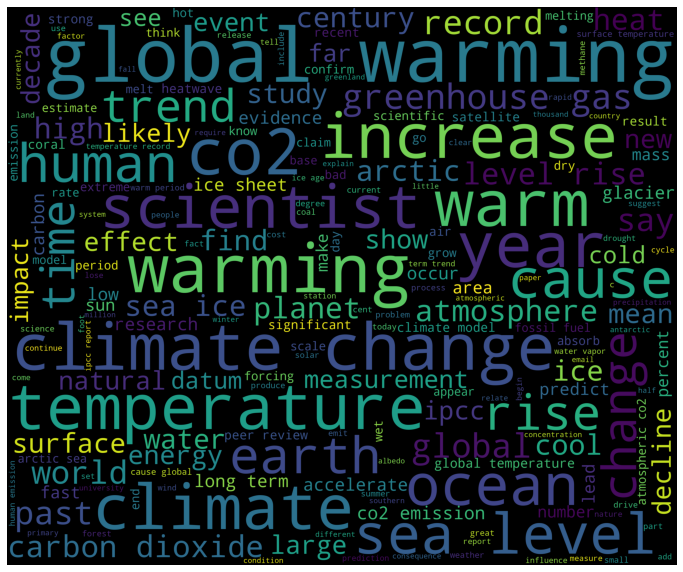

In [80]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_5)
plt.axis('off')
plt.show()

In [81]:
data.head(10)

claim  \
0                                                                                global warming drive polar bear extinction   
1                                                          sun go lockdown cause freeze weather earthquake famine scientist   
2                                                                                                polar bear population grow   
3                                                                                ironic study find co2 slightly cool planet   
4  human addition co2 margin error current measurement gradual increase co2 mainly ocean degas planet slowly emerge ice age   
5                                   tell primary force control earth temperature burning fossil fuel release carbon dioxide   
6                                                                 great barrier reef experience widespread bleaching record   
7                                                                                     pollutant threaten human civilization   
8                                                            co2 terrible planet instal co2 generator greenhouse kill plant   
9                                                                 sea level rise slow constant pre dating industrialization   

  claim_label  \
0    SUPPORTS   
1    SUPPORTS   
2     REFUTES   
3     REFUTES   
4     REFUTES   
5    SUPPORTS   
6    SUPPORTS   
7     REFUTES   
8     REFUTES   
9     REFUTES   

                                                                                                                                                                                                                                                         POS  \
0                                                                                                                                                                     [(global, JJ), (warming, VBG), (drive, JJ), (polar, JJ), (bear, NN), (extinction, NN)]   
1                                                                                                                          [(sun, NN), (go, VBP), (lockdown, JJ), (cause, NN), (freeze, NN), (weather, NN), (earthquake, NN), (famine, JJ), (scientist, NN)]   
2                                                                                                                                                                                                    [(polar, JJ), (bear, JJ), (population, NN), (grow, NN)]   
3                                                                                                                                                              [(ironic, JJ), (study, NN), (find, VBP), (co2, NN), (slightly, RB), (cool, JJ), (planet, NN)]   
4  [(human, JJ), (addition, NN), (co2, NN), (margin, NN), (error, NN), (current, JJ), (measurement, NN), (gradual, JJ), (increase, NN), (co2, NN), (mainly, RB), (ocean, JJ), (degas, NNS), (planet, VBP), (slowly, RB), (emerge, JJ), (ice, NN), (age, NN)]   
5                                                                              [(tell, VB), (primary, JJ), (force, NN), (control, NN), (earth, JJ), (temperature, NN), (burning, VBG), (fossil, JJ), (fuel, NN), (release, NN), (carbon, NN), (dioxide, NN)]   
6                                                                                                                                                [(great, JJ), (barrier, NN), (reef, NN), (experience, NN), (widespread, JJ), (bleaching, NN), (record, NN)]   
7                                                                                                                                                                                         [(pollutant, JJ), (threaten, JJ), (human, JJ), (civilization, NN)]   
8                                                                                                                             [(co2, NN), (terrible, JJ), (planet, NN), (instal, JJ), (co2, NN), (generator, NN), (greenhouse, NN), 

In [82]:
cleaned_word_5

'global warming drive polar bear extinction sun go lockdown cause freeze weather earthquake famine scientist tell primary force control earth temperature burning fossil fuel release carbon dioxide great barrier reef experience widespread bleaching record volcano melt west antarctic glaciers global warming discovery massive volcanic co2 emissions discredits global warming theory 500 scientist professional climate relate field send european climate declaration secretary general united nations co2 cause climate change respond earth mean temperature 2000 year show previous period temperature warm 1200 ad epoch call roman warm period recently medieval warm period 9001100 ad cold weather grip world solar minimum deepen nasa say model predict time warm world see 1988 science clear climate change make extreme weather event include tornado bad climate scientist aspect case hurricane harvey suggest global warming make bad situation bad likely primary control knob climate change ocean water envir

In [83]:
doc = nlp(cleaned_word_5)
spacy.displacy.serve(doc, style='ent')


Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


# USE TEXTBLOB FOR WORD COUNT, FREQUENCIES - SUPPORTS

In [84]:
from textblob import TextBlob


In [85]:
blob = TextBlob(cleaned_word_5)
word_freq = blob.word_counts

for word, freq in word_freq.items():
    print(f"{word}: {freq}")

global: 137
warming: 154
drive: 9
polar: 9
bear: 5
extinction: 4
sun: 14
go: 11
lockdown: 1
cause: 55
freeze: 1
weather: 21
earthquake: 1
famine: 3
scientist: 53
tell: 8
primary: 7
force: 4
control: 5
earth: 38
temperature: 91
burning: 3
fossil: 10
fuel: 12
release: 9
carbon: 41
dioxide: 26
great: 14
barrier: 5
reef: 10
experience: 4
widespread: 3
bleaching: 7
record: 41
volcano: 4
melt: 10
west: 4
antarctic: 10
glaciers: 1
discovery: 2
massive: 3
volcanic: 5
co2: 89
emissions: 2
discredits: 2
theory: 6
500: 4
professional: 3
climate: 133
relate: 7
field: 6
send: 3
european: 2
declaration: 3
secretary: 2
general: 2
united: 8
nations: 2
change: 96
respond: 2
mean: 21
2000: 3
year: 71
show: 20
previous: 4
period: 20
warm: 76
1200: 1
ad: 2
epoch: 1
call: 6
roman: 1
recently: 3
medieval: 5
9001100: 1
cold: 16
grip: 1
world: 26
solar: 17
minimum: 4
deepen: 1
nasa: 4
say: 26
model: 22
predict: 14
time: 32
see: 16
1988: 2
science: 9
clear: 8
make: 13
extreme: 18
event: 24
include: 9
tornado: 

In [86]:
items_5 = blob.word_counts.items()

In [87]:
from operator import itemgetter
sorted_items_5 = sorted(items_5, key=itemgetter(1), reverse=True)

In [88]:
top20 = sorted_items_5[1:21]

In [89]:
 df_support_after = pd.DataFrame(top20, columns=['word', 'count'])

In [90]:
 df_support_after

word  count
0        global    137
1       climate    133
2        change     96
3   temperature     91
4           co2     89
5           ice     82
6           sea     79
7          warm     76
8         level     73
9          year     71
10         rise     65
11     increase     58
12        cause     55
13        human     55
14    scientist     53
15        ocean     50
16       carbon     41
17       record     41
18          gas     41
19     emission     40

# Visualizing the DataFrame After Text Prepocessing - SUPPORTS

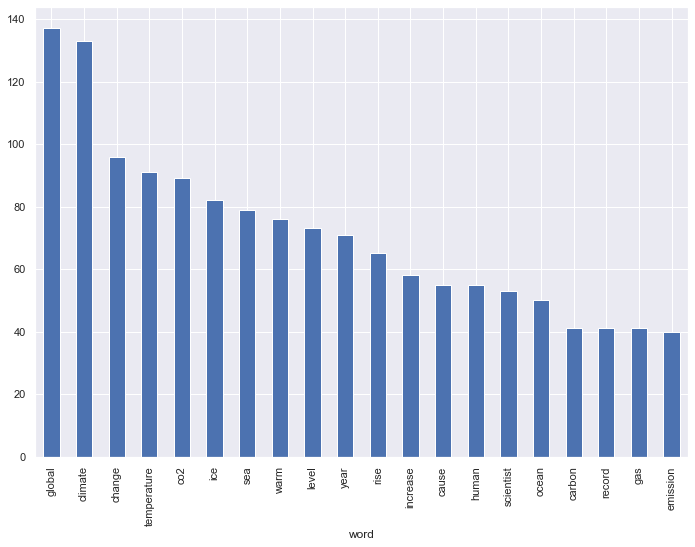

In [91]:
axes =  df_support_after.plot.bar(x='word', y='count', legend=False)

# Word Cloud for Disputed - After Text Processing

In [92]:
dispute_after=data[data['claim_label']=='DISPUTED']
words = ' '.join(dispute_after['claim'])
cleaned_word_6 = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [93]:
wordcloud_6 = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_6)

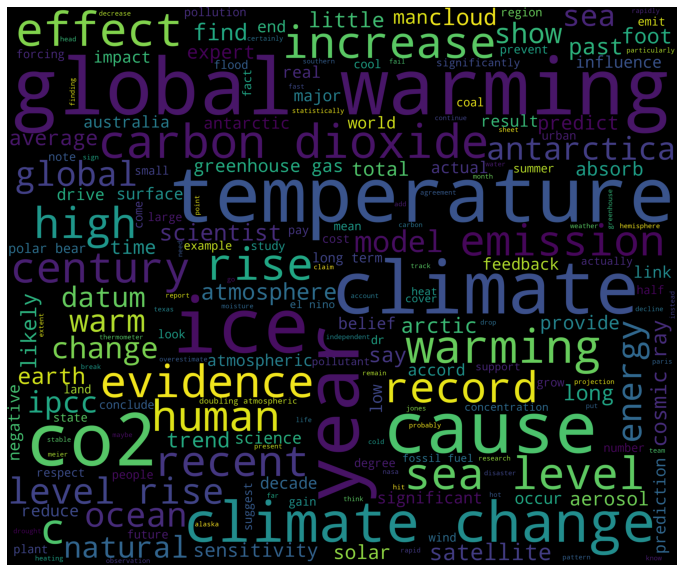

In [94]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_6)
plt.axis('off')
plt.show()

In [95]:
cleaned_word_6

't he raw datum actual thermometer datum show cool 80 90 year mean probably half maybe half tenth degree total warming cause greenhouse gas windmill spin fall apart generate energy invest build sea level rise depend ocean temperature certainly co2 geological history planet show major planetary climate change drive trace gas interview bbc scandal break dr jones admit statistically significant global warming 1995 model predict seven time warming observe atmospheric moisture originate tropical ocean difference surface upper atmospheric temperature determine moisture rise atmosphere month hot june record european satellite agency announce recent ipcc report lay future limit global heating 15 c instead paris agreement 2 c past explosion plant life carbon dioxide content far high present subsidy wind solar add emission coal fire electricity need standby wind sunshine 1998 little warming occur carbon dioxide emission continue increase brooks add antarctic ice grow plenty study come respect an

In [96]:
doc = nlp(cleaned_word_6)
spacy.displacy.serve(doc, style='ent')


Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


# USE TEXTBLOB FOR WORD COUNT, FREQUENCIES - DISPUTED

In [97]:
blob = TextBlob(cleaned_word_6)
word_freq_6 = blob.word_counts

for word, freq in word_freq.items():
    print(f"{word}: {freq}")

global: 137
warming: 154
drive: 9
polar: 9
bear: 5
extinction: 4
sun: 14
go: 11
lockdown: 1
cause: 55
freeze: 1
weather: 21
earthquake: 1
famine: 3
scientist: 53
tell: 8
primary: 7
force: 4
control: 5
earth: 38
temperature: 91
burning: 3
fossil: 10
fuel: 12
release: 9
carbon: 41
dioxide: 26
great: 14
barrier: 5
reef: 10
experience: 4
widespread: 3
bleaching: 7
record: 41
volcano: 4
melt: 10
west: 4
antarctic: 10
glaciers: 1
discovery: 2
massive: 3
volcanic: 5
co2: 89
emissions: 2
discredits: 2
theory: 6
500: 4
professional: 3
climate: 133
relate: 7
field: 6
send: 3
european: 2
declaration: 3
secretary: 2
general: 2
united: 8
nations: 2
change: 96
respond: 2
mean: 21
2000: 3
year: 71
show: 20
previous: 4
period: 20
warm: 76
1200: 1
ad: 2
epoch: 1
call: 6
roman: 1
recently: 3
medieval: 5
9001100: 1
cold: 16
grip: 1
world: 26
solar: 17
minimum: 4
deepen: 1
nasa: 4
say: 26
model: 22
predict: 14
time: 32
see: 16
1988: 2
science: 9
clear: 8
make: 13
extreme: 18
event: 24
include: 9
tornado: 

In [98]:
items_6 = blob.word_counts.items()

In [99]:
from operator import itemgetter
sorted_items_6 = sorted(items_6, key=itemgetter(1), reverse=True)

In [100]:
top20 = sorted_items_6[1:21]

In [101]:
 df_disputed_after = pd.DataFrame(top20, columns=['word', 'count'])

In [102]:
 df_disputed_after

word  count
0       warming     35
1        global     32
2        change     26
3   temperature     22
4           ice     22
5          year     21
6          rise     21
7         level     20
8           co2     20
9         cause     19
10          sea     19
11       carbon     14
12      dioxide     12
13       effect     12
14     increase     11
15     evidence     11
16       record     10
17       recent     10
18            c     10
19         high     10

# Visualizing the DataFrame After Text Prepocessing - DISPUTED

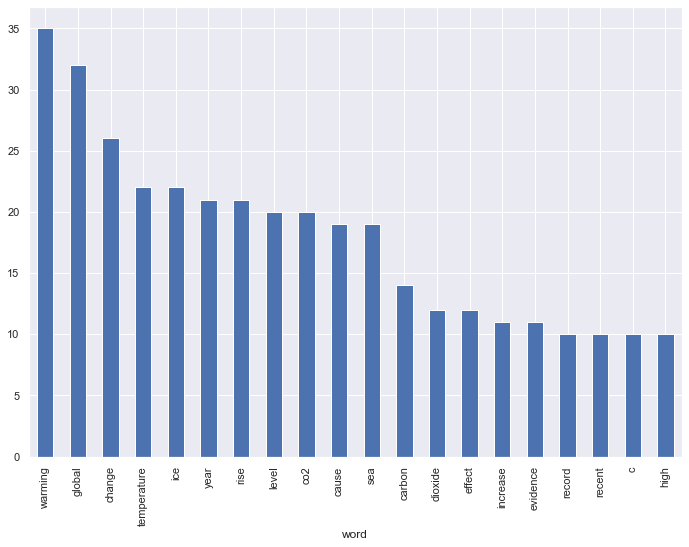

In [103]:
axes =  df_disputed_after.plot.bar(x='word', y='count', legend=False)

# Word Cloud for REFUTES After Text Processing

In [104]:
refute_after=data[data['claim_label']=='REFUTES']
words = ' '.join(refute_after['claim'])
cleaned_word_7 = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [105]:
wordcloud_7 = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_7)

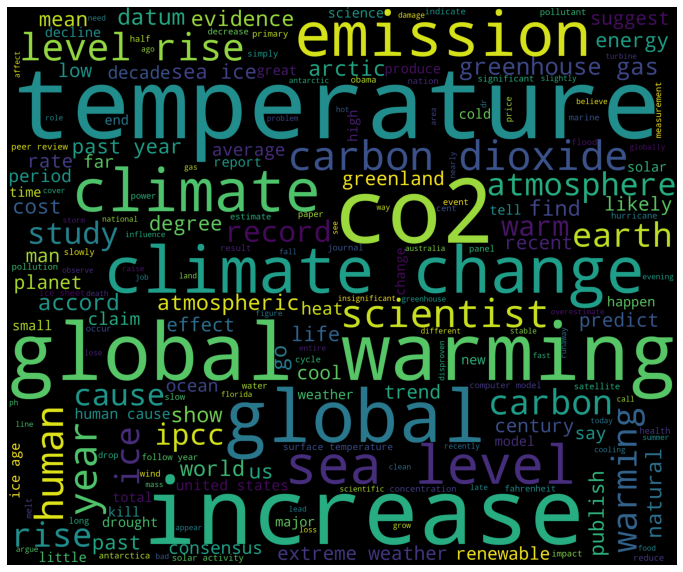

In [106]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_7)
plt.axis('off')
plt.show()

In [107]:
#cleaned_word_7

In [108]:
doc = nlp(cleaned_word_7)
spacy.displacy.serve(doc, style='ent')


Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


# USE TEXTBLOB FOR WORD COUNT, FREQUENCIES - REFUTES

In [109]:
blob = TextBlob(cleaned_word_7)
word_freq_7 = blob.word_counts

for word, freq in word_freq.items():
    print(f"{word}: {freq}")

global: 137
warming: 154
drive: 9
polar: 9
bear: 5
extinction: 4
sun: 14
go: 11
lockdown: 1
cause: 55
freeze: 1
weather: 21
earthquake: 1
famine: 3
scientist: 53
tell: 8
primary: 7
force: 4
control: 5
earth: 38
temperature: 91
burning: 3
fossil: 10
fuel: 12
release: 9
carbon: 41
dioxide: 26
great: 14
barrier: 5
reef: 10
experience: 4
widespread: 3
bleaching: 7
record: 41
volcano: 4
melt: 10
west: 4
antarctic: 10
glaciers: 1
discovery: 2
massive: 3
volcanic: 5
co2: 89
emissions: 2
discredits: 2
theory: 6
500: 4
professional: 3
climate: 133
relate: 7
field: 6
send: 3
european: 2
declaration: 3
secretary: 2
general: 2
united: 8
nations: 2
change: 96
respond: 2
mean: 21
2000: 3
year: 71
show: 20
previous: 4
period: 20
warm: 76
1200: 1
ad: 2
epoch: 1
call: 6
roman: 1
recently: 3
medieval: 5
9001100: 1
cold: 16
grip: 1
world: 26
solar: 17
minimum: 4
deepen: 1
nasa: 4
say: 26
model: 22
predict: 14
time: 32
see: 16
1988: 2
science: 9
clear: 8
make: 13
extreme: 18
event: 24
include: 9
tornado: 

In [110]:
items_7 = blob.word_counts.items()

from operator import itemgetter
sorted_items_7 = sorted(items_7, key=itemgetter(1), reverse=True)

top20 = sorted_items_5[1:21]

In [111]:
df_refutes_after = pd.DataFrame(top20, columns=['word', 'count'])
df_refutes_after

word  count
0        global    137
1       climate    133
2        change     96
3   temperature     91
4           co2     89
5           ice     82
6           sea     79
7          warm     76
8         level     73
9          year     71
10         rise     65
11     increase     58
12        cause     55
13        human     55
14    scientist     53
15        ocean     50
16       carbon     41
17       record     41
18          gas     41
19     emission     40

# Visualizing the DataFrame After Text Prepocessing - REFUTES

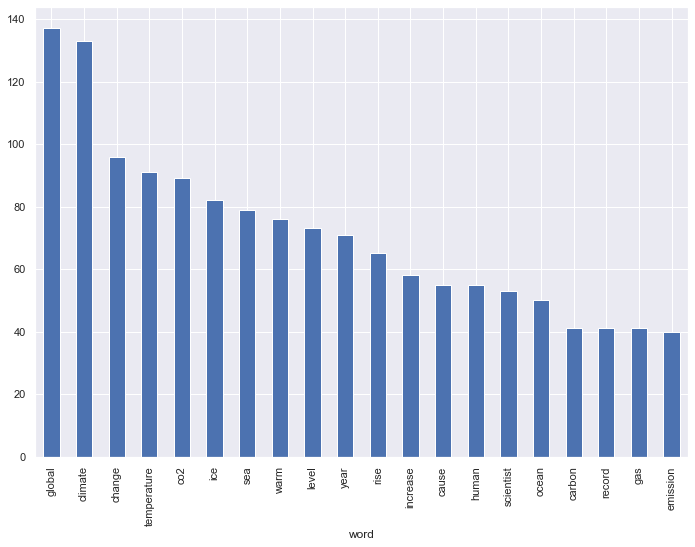

In [112]:
axes = df_refutes_after.plot.bar(x='word', y='count', legend=False)

# Word Cloud for NOT_ENOUGH_INFO After Text Processing

In [113]:
NEI_after=data[data['claim_label']=='NOT_ENOUGH_INFO']
words = ' '.join(NEI_after['claim'])
cleaned_word_8 = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [114]:
wordcloud_8 = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_8)

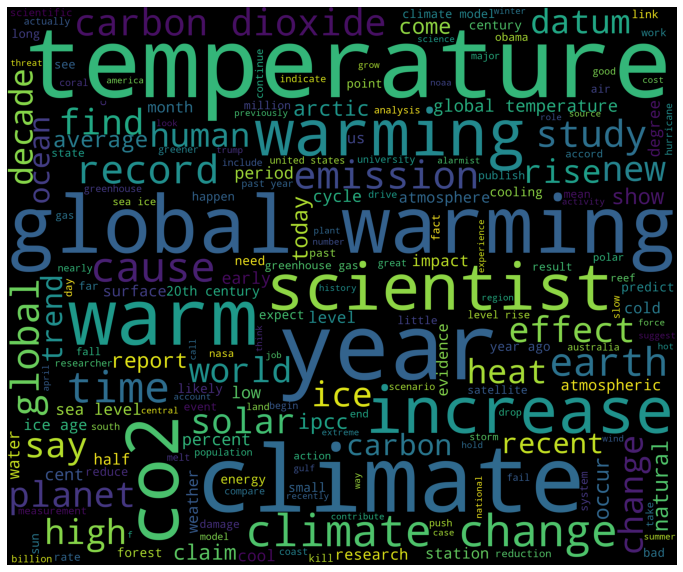

In [115]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_8)
plt.axis('off')
plt.show()

In [116]:
cleaned_word_8

'earth enter 30 year mini ice age bushfire australia cause arsonist series lightning strike climate change exact group expert claim global cooling 1977 claim global warming easily skeptical nasa adjust temperature past thousand year ago world 2 c warm today o ne previously fast shrink glacier world grow call question narrative rapid climate change burp cow damaging climate car planet s unspot activity surface star drop new low noaa adjust past temperature look cold recent temperature look warm go go set record unadjusted datum suggest temperature australia increase 03 degree past century 1 degree usually claim trump action push earth brink like venus temperature degree rain sulphuric acid rate magnitude report late twentieth century surface warming 19792000 lie outside normal natural variability forward projection solar cyclicity imply decade mark global cooling warm despite continue co2 emission sea level rise occur long human blame accelerate sea level rise reach seven foot year 2100

In [117]:
doc = nlp(cleaned_word_8)
spacy.displacy.serve(doc, style='ent')


Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


# USE TEXTBLOB FOR WORD COUNT, FREQUENCIES - NOT_ENOUGH_INFO

In [118]:
blob = TextBlob(cleaned_word_8)
word_freq_8 = blob.word_counts

for word, freq in word_freq.items():
    print(f"{word}: {freq}")

global: 137
warming: 154
drive: 9
polar: 9
bear: 5
extinction: 4
sun: 14
go: 11
lockdown: 1
cause: 55
freeze: 1
weather: 21
earthquake: 1
famine: 3
scientist: 53
tell: 8
primary: 7
force: 4
control: 5
earth: 38
temperature: 91
burning: 3
fossil: 10
fuel: 12
release: 9
carbon: 41
dioxide: 26
great: 14
barrier: 5
reef: 10
experience: 4
widespread: 3
bleaching: 7
record: 41
volcano: 4
melt: 10
west: 4
antarctic: 10
glaciers: 1
discovery: 2
massive: 3
volcanic: 5
co2: 89
emissions: 2
discredits: 2
theory: 6
500: 4
professional: 3
climate: 133
relate: 7
field: 6
send: 3
european: 2
declaration: 3
secretary: 2
general: 2
united: 8
nations: 2
change: 96
respond: 2
mean: 21
2000: 3
year: 71
show: 20
previous: 4
period: 20
warm: 76
1200: 1
ad: 2
epoch: 1
call: 6
roman: 1
recently: 3
medieval: 5
9001100: 1
cold: 16
grip: 1
world: 26
solar: 17
minimum: 4
deepen: 1
nasa: 4
say: 26
model: 22
predict: 14
time: 32
see: 16
1988: 2
science: 9
clear: 8
make: 13
extreme: 18
event: 24
include: 9
tornado: 

In [119]:
items_8 = blob.word_counts.items()

In [120]:
from operator import itemgetter
sorted_items_8 = sorted(items_8, key=itemgetter(1), reverse=True)

top20 = sorted_items_5[1:21]

In [121]:
df_NEI_after = pd.DataFrame(top20, columns=['word', 'count'])
df_NEI_after

word  count
0        global    137
1       climate    133
2        change     96
3   temperature     91
4           co2     89
5           ice     82
6           sea     79
7          warm     76
8         level     73
9          year     71
10         rise     65
11     increase     58
12        cause     55
13        human     55
14    scientist     53
15        ocean     50
16       carbon     41
17       record     41
18          gas     41
19     emission     40

# Visualizing the DataFrame After Text Prepocessing - NOT_ENOUGH_INFO

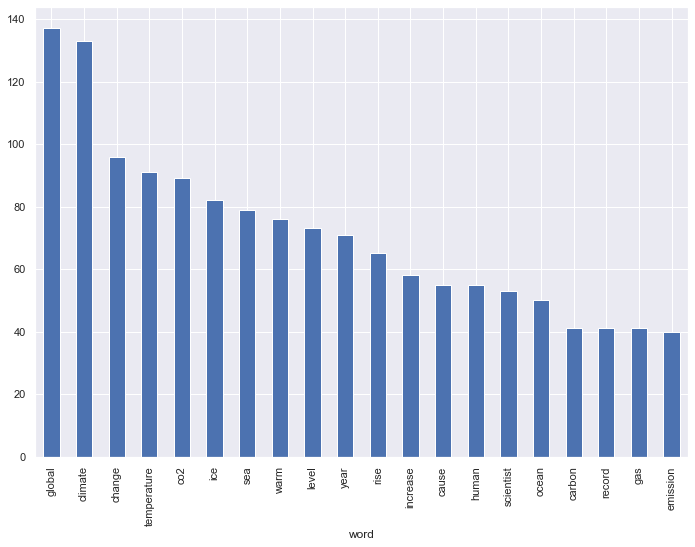

In [122]:
axes = df_NEI_after.plot.bar(x='word', y='count', legend=False)